# Numerische Ableitung

## Arbeitsblatt zur Einarbeitung

Dieses Arbeitsblatt muss vor dem Präsenzunterricht durchgearbeitet werden.

Das Ziel ist, eine Näherung der Ableitung zu berechnen, ohne die Funktionsgleichung und somit ihre analytische Ableitung zu kennen. Das Verfahren hierzu wirst du selbst rudimentär implementiern.

Im Präsenzunterricht vertiefen wir das Thema noch etwas. Dabei werden wir sehen, dass man leicht anders vorgehen muss, wenn man nur Messwerte und keine Funktion zur Verfügung hat, die man überall auswerden kann.

## Ableitung ausgehend von einer Funktion

Wenn wir eine (numerische) Funktion $f : I \to \mathbb{R}$ gegeben haben, dann könnten wir grundsätzlich die Ableitung an einer Stelle $x\in I$ anhand des Differenzenquotienten $\frac{\Delta y}{\Delta x}$ schätzen. Statt $\Delta x$ schreiben wir $h$, also

$$ f'(x) \simeq \frac{f(x+h) - f(x)}{h} $$

Wie gross $h$ zu wählen ist, muss man ausprobieren, und hängt vom Verhalten der Funktion ab.

Zudem könnten wir statt einen Schritt um $h$ nach vorne zu machen auch einen Schritt zurück machen, so dass ein "rückwärtsgerichteter" Differenzenquotient berechnet wird. Eine gute Idee ist, den Mittelwert zwischen vorwärts- und rückwärtsgerichtetem Differenzenquotienten zu nehmen:

$$ f'(x) \simeq \frac{1}{2}\left( \frac{f(x+h) - f(x)}{h} + \frac{f(x) - f(x-h)}{h} \right) = \frac{f(x+h) - f(x-h)}{2h} $$

Dieses kurze Video erklärt das Wesentliche:
- ["NumerischesDifferenzieren" - Christian Karpfinger](https://www.youtube.com/watch?v=YPlatku8DYI)

Die folgenden Videos können fürs weitere Verständnis angeschaut werden:
- ["20B.2 zentrale Differenzformeln; Ableitung numerisch" - Jörn Loviscach](https://www.youtube.com/watch?v=F0elmdI1pfk)
- ["Differenzialrechnung - Numerische Ableitung und Approximation" - hm-kompakt](https://www.youtube.com/watch?v=zXGwkr9-EIQ)

## Arbeitsauftrag

In [24]:
import numpy as np
import matplotlib.pyplot as plt


### Aufgabe 1: Beispielfunktionen darstellen

Wir betrachten die folgende Funktion

$$f(x) = \cos\left( 2 \pi x (1 + x) \right)$$

- Bestimme die Ableitung $f'(x)$ zuerst analytisch, damit du später eine Vergleichsmöglichkeit hast.
- Definiere $f(x)$ als `f` und die Ableitung $f'(x)$ als `fprime`.
- Stelle die beiden Funktionen in zwei Koordinatensystemen übereinander im Bereich $[-1,1]$ dar.

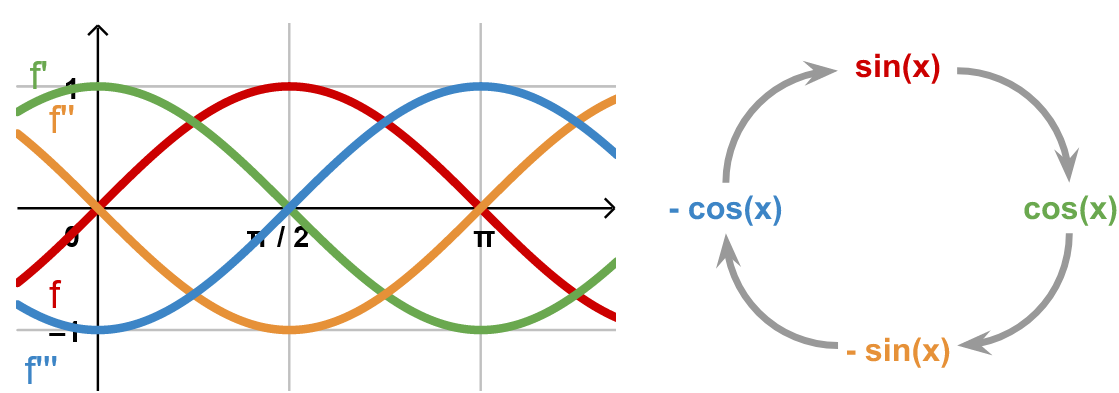

In [25]:
# Funktion definiert
def f(x):
    return np.cos(2 * np.pi * x * (1 + x))


# Ableitung der Funktion
# cos abgeleitet = -sin
#def fprime(x):
    return np.sin(-2 * (2 * x * 1)) * np.sin(2 * np.pi * x * (1 + x))

def fprime(x):
    return -np.sin(2*np.pi *x* (1+x)) *2* np.pi*(1+x)


*Punkte kann man implementieren wenn die Punkte gemessen wurden, jedoch wenn es einen Linspace ist, dann kann man die Punkte weglassen, da wir nicht zu einem bestimmten Zeitpunkt gemessen haben.*

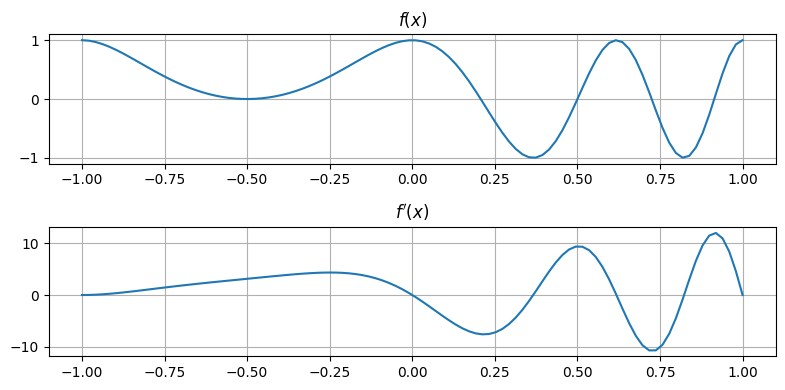

In [26]:
# Funktionen plotten
x = np.linspace(-1,1,100)
fig, (ax1, ax2) = plt.subplots(2,1 , figsize=(8,4), )

ax1.plot(x, f(x))
ax1.set_title('$f(x)$')
ax1.grid()

ax2.set_title("$f'(x)$")
ax2.plot(x, fprime(x))
ax2.grid()

plt.tight_layout()


### Aufgabe 2: Numerische Ableitung an einer Stelle

**a)** Schreibe eine Funktion `deriv(f, x, h)`, welche die Ableitung an einer Stelle $x$ wie folgt schätzt:

$$ f'(x) \simeq \frac{f(x+h) - f(x-h)}{2h} $$

- `f`: die Funktion, die abgeleitet wird
- `x`: die Stelle, an der abgeleitet wird
- `h`: die Schrittweite der Schätzung

In [27]:
# Diese Funktion ist eine Abschätzung der 1. Ableitung. 
# Sie nimmt zwei Punkte und verbindet Sie 
def deriv(f, x, h):
    return (f(x + h) - f(x)) / (2 * h)

**b)** Teste `deriv` an der Stelle $x=0.25$ mit $h=0.01$. Du solltest $-8.69220992831535$ erhalten.

In [28]:
deriv(f,0.25,0.01)

-4.290078790775179

**c)** Berechne den absoluten Fehler $\Delta_y$: Die Differenz zwischen der numerischen Schätzung und der analytischen Funktion. Benutze wieder $x=0.25$ und $h=0.01$. Du solltest $0.0151495281029419$ erhalten.

$\Delta_y = |f'(x) - \text{deriv}(f, x, h)|$

Hier ist $f'(x)$ der analytische Wert der Ableitung der Funktion $f(x)$ an der Stelle $x$, und $\text{deriv}(f, x, h)$ ist die numerische Schätzung der Ableitung von $f(x)$ an der Stelle $x$ mit Schrittweite $h$.

**Wenn der `Absolute Fehler ` negativ ist -> der Fehler wurde ``unterschätzt``
Wenn der `Absoute Fehler` positiv ist -> der Fehler `überschätzung`**

In [29]:
delta_y = fprime(0.25) - deriv(f,0.25,0.01)

#absutwert des absoluten Wert 
abs(delta_y)

2.9660540895733982

### Aufgabe 3: Numerische Ableitung darstellen

- Stelle die analytische Ableitung `fprime` und deine numerische Ableitung `deriv` zusammen in einem Diagramm.
- Wähle dazu 50 Punkte im Bereich $[-1,1]$.
- Die Schätzungen mittels `deriv` sollen als rote Punkte dargestellt werden.

Benutze zuerst $h=0.1$ und verkleinere $h$ dann sukzessive. Beobachte wie sich das Resultat ändert.

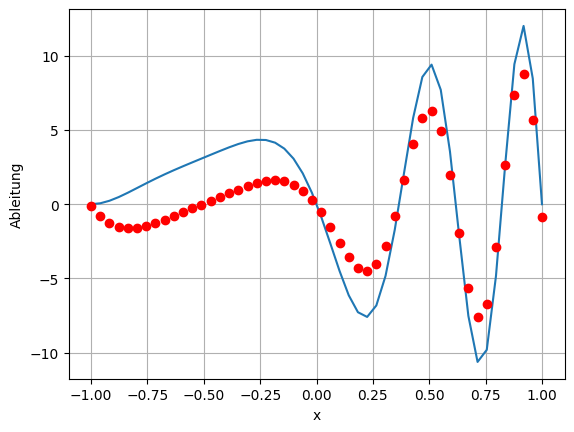

In [30]:
x = np.linspace(-1,1)
y_prime = fprime(x)
y_deriv= deriv(f,x,0.01)


# je kleiner man h bestimmt umso näher, nähert sich die Funktion der urpsprünglichen Funktion an. 

plt.plot(x,y_prime, label="Analytisch")
plt.plot(x,y_deriv, "ro", label= "deriv")
plt.xlabel("x")
plt.ylabel("Ableitung")

plt.grid()


*Wenn man zwei funktionen hat die die gleichen y Parameter Teilen sollte man dies im gleichen Graphen einplotten*

*Wenn man vorallem zwei Analtisch/Numerische Funktionen Vergleichen will, muss man diese in **`einem`** plott darstellen!* 

### Aufgabe 4: Fehler bestimmen und darstellen

Berechne den absoluten Fehler der geschätzten Ableitung: Unterschied zwischen numerischer und analytischer Ableitung. Dieser soll positiv sein, wenn die numerische Näherung grösser ist als das analytische Resultat.

Stelle den Fehler grafisch dar. Und schau dir wieder an, was passiert, wenn du $h$ kleiner machst.

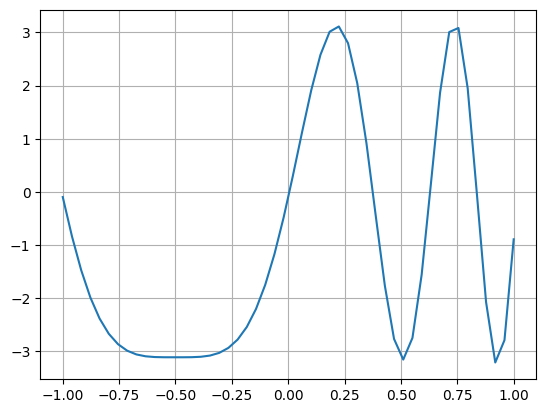

In [31]:
differenz = y_deriv - y_prime

plt.plot(x, differenz)

plt.grid()

### Aufgabe 5: Interpretation der Fehler

Welche Aussagen kannst über den Fehler und die Abhängigkeit von $h$ machen?

Je GRÖSSER man h wählt umso GRÖSSER ist die schwankung. 

**Antwort von der Lösung**

Beobachtungen:
- Je grösser Schwankung in der Ableitung, desto grösser der Fehler der Näherung der Ableitung.
  - Das bedeutet: Je grösser zweite Ableitung $f''(x)$, desto grösser die Fehler in der Berechnung von $f'(x)$.
- Je kleiner $h$, desto kleiner die Fehler in der numerischen Ableitung.
  - Dabei ändert sich aber nur die Amplitude des Fehlers und nicht die Abhängigkeit von $x$. Das heisst, die Form der "Fehlerkurve" bleibt gleich auch bei sehr kleinen $h$.
  - Nimmt man sehr kleine $h$, also z.B. $h=10^{-10}$, so ändert sich die Abhängigkeit des Fehlers von $x$ und die Fehler werden wieder grösser. 

**Abschreiben von den Lösungen**


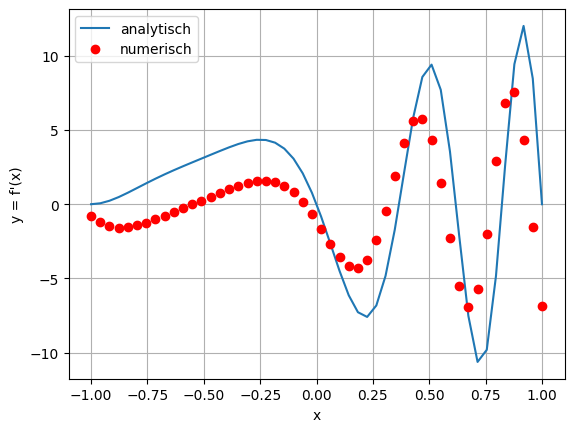

In [33]:
h = 1e-1
x = np.linspace(-1, 1)
yprime = fprime(x)
yderiv = deriv(f, x, h)

plt.plot(x, yprime, label="analytisch")
plt.plot(x, yderiv, "or", label="numerisch")
plt.xlabel("x")
plt.ylabel("y = f'(x)")
plt.grid()
plt.legend()
plt.show()

**Das Darstellen von Exponetialfunktionen werden meistens in einer `Logarithmischen`, Skala nachgewiesen**